# Notations and data

## Notations

This section aims at providing the formal mathematical conventions that will be used throughout the book.

Bold notations indicate vectors and matrices. We use capital letters for matrices and lower case letters for vectors. $\mathbf{v}'$ and $\mathbf{M}'$ denote the transposes of $\mathbf{v}$ and $\mathbf{M}$. $\mathbf{M}=[m]_{i,j}$ where $i$ is the row index and $j$ the column index.

We will work with two notations in parallel. The first one is the pure machine learning notation in which the **labels** (also called **output**, **dependent** variables or **predicted** variables) $\mathbf{y}=y_i$ are approximated by functions of features $\mathbf{X}_i=(x_{i,1},\dots,x_{i,K})$. The dimension of the features matrix $\mathbf{X}$ is $I\times K$: there are $I$ **instances**, **records**, or **observations** and each one of them has $K$ **attributes**, **features**, **inputs**, or **predictors** which will serve as **independent** and **explanatory** variables (all these terms will be used interchangeably). Sometimes, to ease notations, we will write $\textbf{x}_i$ for one instance (one row) of $\textbf{X}$ or $\textbf{x}_k$ for one (feature) column vector of $\textbf{X}$.

The second notation type pertains to finance and will directly relate to the first. We will often work with discrete returns $r_{t,n}=p_{t,n}/p_{t-1,n}-1$ computed from price data. Here $t$ is the time index and $n$ the asset index. Unless specified otherwise, the return is always computed over one period, though this period can sometimes be one month or one year. Whenever confusion might occur, we will specify other notations for returns.

In line with our previous conventions, the number of return dates will be $T$ and the number of assets, $N$. The features or characteristics of assets will be denoted with $x_{t,n}^{(k)}$: it is the time-$t$ value of the $k^{th}$ attribute of firm or asset $n$. In stacked notation, $\mathbf{x}_{t,n}$ will stand for the vector of characteristics of asset $n$ at time $t$. Moreover, $\mathbf{r}_t$ stands for all returns at time $t$ while $\mathbf{r}_n$ stands for all returns of asset $n$. Often, returns will play the role of the dependent variable, or label (in ML terms). For the riskless asset, we will use the notation $r_{t,f}$.

The link between the two notations will most of the time be the following. One **instance** (or **observation**) $i$ will consist of one couple ($t,n$) of one particular date and one particular firm (if the data is perfectly rectangular with no missing field,$I=T\times N$). The label will usually be some performance measure of the firm computed over some future period, while the features will consist of the firm attributes at time-$t$. Hence, the purpose of the machine learning engine in factor investing will be to determine the model that maps the time-$t$ characteristics of firms to their future performance.

In terms of canonical matrices: $\mathbf{I}_N$ will denote the $(N\times N)$ identity matrix.

From the probabilistic literature, we employ the expectation operator $\mathbb{E}[\cdot]$ and the conditional expectation $\mathbb{E}_t[\cdot]$, where the corresponding filtration $\mathcal{F}_t$ corresponds to all information available at time . More precisely, $\mathbb{E}_t[\cdot]=\mathbb{E}[\cdot | \mathcal{F}_t]$ $\mathbb{V}[\cdot]$ will denote the variance operator. Depending on the context, probabilities will be written simply $P$, but sometimes we will use the heavier notation $\mathbb{P}$. Probability density functions (pdfs) will be denoted with lowercase letters ($f$) and cumulative distribution functions (cdfs) with uppercase letters ($F$). We will write equality in distribution as $X \overset{d}{=}Y$, which is equivalent to $F_X(z)=F_Y(z)$ for all $z$ on the support of the variables. For a random process $X_t$, we say that it is **stationary** if the law of $X_t$ is constant through time, i.e., $X_t\overset{d}{=}X_s$, where $\overset{d}{=}$ means equality in distribution.

Sometimes, asymptotic behaviors will be characterized with the usual Landau notation $o(\cdot)$ and $O(\cdot)$. The symbol $\propto$ refers to proportionality: $x\propto y$ means that $x$ is proportional to $y$. With respect to derivatives, we use the standard notation $\frac{\partial}{\partial x}$ when differentiating with respect to $x$. We resort to the compact symbol $\nabla$ when all derivatives are computed (gradient vector).

In equations, the left-hand side and right-hand side can be written more compactly: l.h.s. and r.h.s., respectively.

Finally, we turn to functions. We list a few below:
- $1_{\{x \}}$: the indicator function of the condition $x$, which is equal to one if $x$
  is true and to zero otherwise.
- $\phi(\cdot)$ and $\Phi(\cdot)$ are the standard Gaussian pdf and cdf.
- card $(\cdot)=\#(\cdot)$ are two notations for the cardinal function which evaluates the number of elements in a given set (provided as argument of the function).
- $\lfloor \cdot \rfloor$ is the integer part function.
- for a real number $x$,$[x]^+$
  is the positive part of $x$, that is max $\max(0,x)$
- tanh$(\cdot)$ is the hyperbolic tangent: tanh$(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$
- ReLu$(\cdot)$ is the rectified linear unit: ReLu$(x)=\max(0,x)$
- s$(\cdot)$ will be the softmax function: s$(\textbf{x})_i=\frac{e^{x_i}}{\sum_{j=1}^Je^{x_j}}$, where the subscript $i$ refers to the $i^{th}$ element of the vector.


## Dataset

### Presentation

Throughout the book, and for the sake of **reproducibility**, we will illustrate the concepts we present with examples of implementation based on a single financial dataset available at https://github.com/shokru/mlfactor.github.io/tree/master/material. This dataset comprises information on 1,207 stocks listed in the US (possibly originating from Canada or Mexico). The time range starts in November XXX and ends in March XXXX. For each point in time, 123 **characteristics** describe the firms in the sample. These attributes cover a wide range of topics:  
- **valuation** (earning yields, accounting ratios);
- **profitability** and quality (return on equity);
- **momentum** and technical analysis (past returns, relative strength index);
- **risk** (volatilities);
- **estimates** (earnings-per-share);
- **volume** and **liquidity** (share turnover).

The sample is not perfectly rectangular (balanced): there are no missing points, but the number of firms and their attributes is not constant through time. This makes the computations in the backtest more tricky, but also more realistic.

### Exploration

In [29]:
import pandas as pd                                  # Activate the data science package
data_raw=pd.read_csv('factors_map_all_US.csv')       # Load the data
idx_date=data_raw.index[(data_raw['date'] > '1995-12-31') & (data_raw['date'] < '2025-06-01')].tolist() # creating and index to retrive the dates
data_ml=data_raw.iloc[idx_date]                      # filtering the dataset according to date index
data_ml = data_ml.drop(columns = 'Unnamed: 0')

In [30]:
data_ml.iloc[0:6,0:6]

,date,fsym_id,ADV_TradedLT,ADV_TradedMT,ADV_TradedST,Asset_Turn
0,2003-02-28,BSZJ5W-R,0.5,0.5,0.108108,0.581081
1,2003-02-28,BV3N5V-R,0.5,0.5,0.729730,0.513514
2,2003-02-28,BYKM67-R,0.5,0.5,0.135135,0.878378
3,2003-02-28,BZPTB8-R,0.5,0.5,0.675676,0.905405
4,2003-02-28,CHKL7S-R,0.5,0.5,0.905405,0.554054
5,2003-02-28,CPCV0Y-R,0.5,0.5,0.716216,0.135135


In [31]:
data_ml.shape

(221372, 129)

In [32]:
data_ml.columns

Index(['date', 'fsym_id', 'ADV_TradedLT', 'ADV_TradedMT', 'ADV_TradedST',
       'Asset_Turn', 'Book_Value_PS', 'Buyback_Yield', 'Capex_Assets',
       'Capex_to_OpsCF',
       ...
       'ValueComp', 'VolComp', 'Vol_LT', 'Vol_ST', 'WorkingCapital_Turnover',
       'Working_Capital_TA', 'R12M', 'R1M', 'R3M', 'R6M'],
      dtype='object', length=129)

The data has 129 columns and 159,396 rows. The first two columns indicate the stock identifier and the date. The next 123 columns are the features (see Table XXX in the Appendix for details). The last four columns are the labels. The points are sampled at the monthly frequency. As is often the case in practice, the number of assets changes with time, as is shown below.

Text(0, 0.5, 'nb_assets')

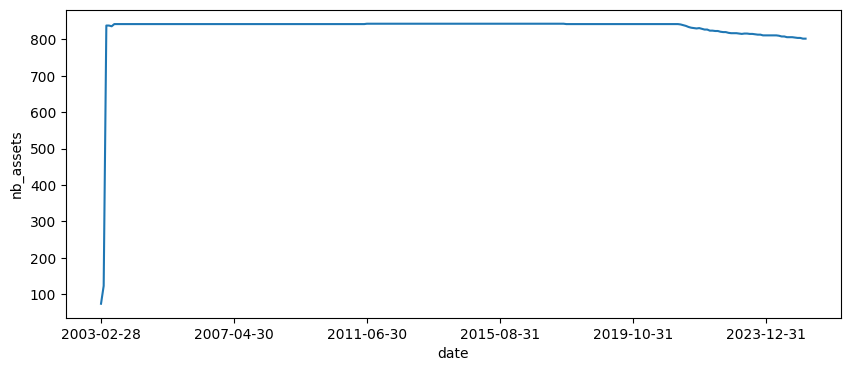

In [33]:
import matplotlib.pyplot as plt
pd.Series(data_ml.groupby('date').size()).plot(figsize=(10,4)) # counting the number of assets for each date
plt.ylabel('nb_assets')                                        # adding the ylabel and plotting 

There are four immediate **labels** in the dataset: R1M, R3M, R6M and R12M, which correspond to the 1-month, 3-month, 6-month and 12-month future/forward returns of the stocks. The returns are **total returns**, that is, they incorporate potential **dividend** payments over the considered periods. This is a better proxy of financial gain compared to price returns only. We refer to the analysis of {cite:p}`hartzmark2019dividend` for a study on the impact of decoupling price returns and dividends. These labels are located in the last 4 columns of the dataset. We provide their descriptive statistics below.

In [34]:
(data_ml[["R1M", "R3M", "R6M", "R12M"]]
    .describe()
    .T
    .loc[:, ["mean", "std", "min", "25%", "50%", "75%", "max"]]
    .round(3))


,mean,std,min,25%,50%,75%,max
R1M,0.013,0.099,-0.742,-0.039,0.011,0.061,2.809
R3M,0.038,0.169,-0.879,-0.054,0.033,0.121,3.289
R6M,0.077,0.253,-0.916,-0.061,0.063,0.190,5.932
R12M,0.150,0.376,-0.962,-0.063,0.114,0.307,6.543


In anticipation for future models, we keep the name of the predictors in memory. In addition, we also keep a much shorter list of predictors.

In [35]:
features=list(data_ml.iloc[:,3:125].columns)
# Keep the feature's column names (hard-coded, beware!)
features_short =["Div_yld", "EPS", "Size12m",
                 "Mom_LT", "Ocf", "PB", "Vol_LT"]

The predictors have been uniformized, that is, for any given feature and time point, the distribution is uniform. Imputation has also been performed, whereby any missing point is assigned the value 0.5. Below, we represent the distribution of dividend yield values, with all imputed values removed. Given roughly 800 stocks, the graph below cannot display a perfect rectangle.

Text(0, 0.5, 'count')

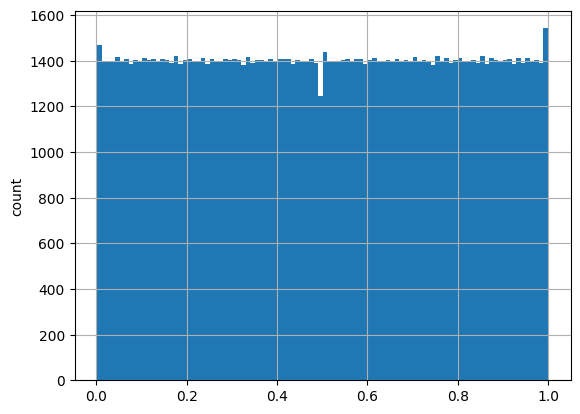

In [36]:
data_ml.query('Div_yld != 0.5')['Div_yld'].hist(bins=100)
# using the hist
plt.ylabel('count')

The original labels (future returns) are numerical and will be used for regression exercises, that is, when the objective is to predict a scalar real number. Sometimes, the exercises can be different and the purpose may be to forecast categories (also called classes), like “buy”, “hold” or “sell”. In order to be able to perform this type of classification analysis, we create additional labels that are categorical.

In [ ]:
import numpy as np
df_median=[]  #creating empty placeholder for temporary dataframe
df=[]         #creating empty placeholder for temporary dataframe
df_median=data_ml[['date','R1M','R12M']].groupby(
    ['date']).median() # computings medians for both labels at each date
df_median.rename(
    columns={"R1M": "R1M_median",
             "R12M": "R12M_median"},inplace=True)
df = pd.merge(data_ml,df_median,how='left', on=['date'])
# join the dataframes
data_ml['R1M_C'] = np.where( # Create the categorical labels
    df['R1M'] > df['R1M_median'], 1.0, 0.0)
data_ml['R12M_C'] = np.where( # Create the categorical labels
    df['R12M'] > df['R12M_median'], 1.0, 0.0)

The new labels are binary: they are equal to 1 (true) if the original return is above that of the median return over the considered period and to 0 (false) if not. Hence, at each point in time, half of the sample has a label equal to zero and the other half to one: some stocks overperform and others underperform.

In machine learning, models are estimated on one portion of data (training set) and then tested on another portion of the data (testing set) to assess their quality. We split our sample accordingly.

In [38]:
separation_date = "2017-01-15"
idx_train=data_ml.index[(data_ml['date']< separation_date)].tolist()
idx_test=data_ml.index[(data_ml['date']>= separation_date)].tolist()

We also keep in memory a few key variables, like the list of asset identifiers and a rectangular version of returns. For simplicity, in the computation of the latter, we shrink the investment universe to keep only the stocks for which we have the maximum number of points. We provide a snapshot of the corresponding matrix. 

In [39]:
stock_ids_short=[]   # empty placeholder for temporary dataframe
stock_days=[]        # empty placeholder for temporary dataframe
stock_ids=data_ml['fsym_id'].unique() # A list of all stock_ids
stock_days=data_ml[['date','fsym_id']].groupby(
    ['fsym_id']).count().reset_index() # compute nbr data points/stock
stock_ids_short=stock_days.loc[
    stock_days['date'] == (stock_days['date'].max())]
# Stocks with full data
stock_ids_short=stock_ids_short['fsym_id'].unique()
# in order to get a list
is_stock_ids_short=data_ml['fsym_id'].isin(stock_ids_short)
returns=data_ml[is_stock_ids_short].pivot(
    index='date',columns='fsym_id',values='R1M') # returns matrix
returns.iloc[0:5,0:5]

fsym_id,BV3N5V-R,BZPTB8-R,CHKL7S-R,CPCV0Y-R,CSMTMQ-R
date,,,,,
2003-02-28,-0.035187,-0.026348,0.135182,0.034763,-0.000831
2003-03-31,0.098823,-0.063574,0.038677,0.043919,0.084473
2003-04-30,0.092791,0.187156,0.075814,0.141857,0.082452
2003-05-31,0.061398,0.098532,-0.037138,0.260852,-0.065874
2003-06-30,0.137763,0.027084,0.016328,0.010442,0.021819
